In [1]:
import pandas as pd
import numpy as np
import os
import json
import shutil

caption_dir = '/kaggle/input/tagged-anime-illustrations/danbooru-metadata/danbooru-metadata'

id_to_tags = {}

for filename in os.listdir(caption_dir):
    f_path = os.path.join(caption_dir, filename)
    if os.path.isfile(f_path):
        with open(f_path, 'r') as f:
            for line in f:
                data = json.loads(line.rstrip())
                tags = [x["name"] for x in data["tags"]]
                caption = " ".join(tags)
                id_to_tags[data["id"]] = caption 

In [2]:
from pathlib import Path

def count_images_fast(folder):
    exts = [".jpg", ".jpeg", ".png", ".webp"]
    return sum(1 for f in Path(folder).rglob("*") if f.suffix.lower() in exts)

# Example usage
folder = "/kaggle/input/tagged-anime-illustrations/danbooru-images/danbooru-images"
total_images = count_images_fast(folder)


In [3]:
from collections import Counter
tag_counter = Counter()

for tags in id_to_tags.values():
    for tag in tags.split(" "):
        tag_counter[tag.strip()] += 1

print("Total unique tags: ", len(tag_counter))

print("\nTop 10 tags:")
for tag, count in tag_counter.most_common(10):
    print(f"{tag}: {count}")

print("\nBottom 10 tags:")
for tag, count in tag_counter.most_common()[-10:]:
    print(f"{tag}: {count}")

Total unique tags:  333333

Top 10 tags:
1girl: 2060363
solo: 1710762
long_hair: 1318516
highres: 1018512
breasts: 900500
blush: 870086
short_hair: 813241
smile: 800738
multiple_girls: 662570
open_mouth: 651028

Bottom 10 tags:
tokumu_sousakan_rei_&_fuko: 1
viara: 1
yusya_digital: 1
tiffany_turlington: 1
a.i._artificial_intelligence: 1
holyniwa: 1
wyvern07: 1
segreto_gioco: 1
1-soa-1: 1
sugiplus: 1


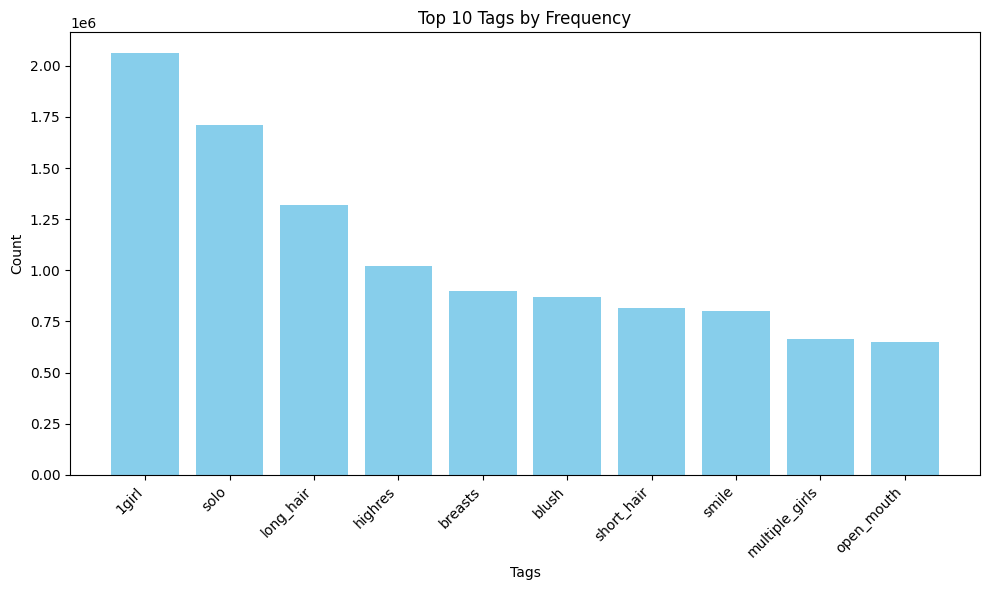

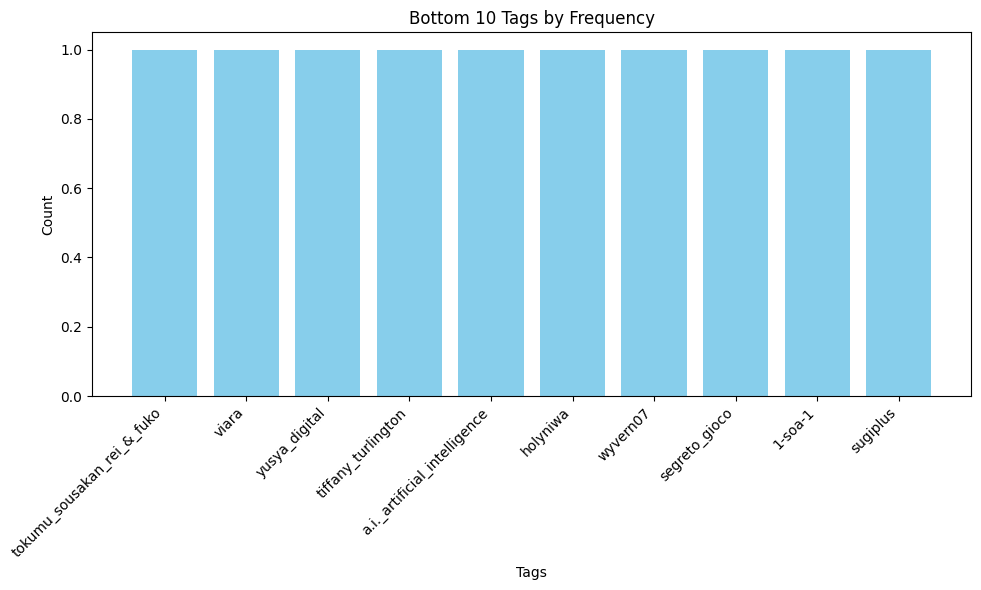

In [4]:
import matplotlib.pyplot as plt
top10 = tag_counter.most_common(10)
bottom10 = tag_counter.most_common()[-10:]
labels, values = zip(*top10)
labels_bottom, values_bottom = zip(*bottom10)
# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Top 10 Tags by Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(labels_bottom, values_bottom, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Bottom 10 Tags by Frequency")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:760: UserWarning: Metadata Warning, tag 296 had too many entries: 2, expected 1
  warnings.warn(


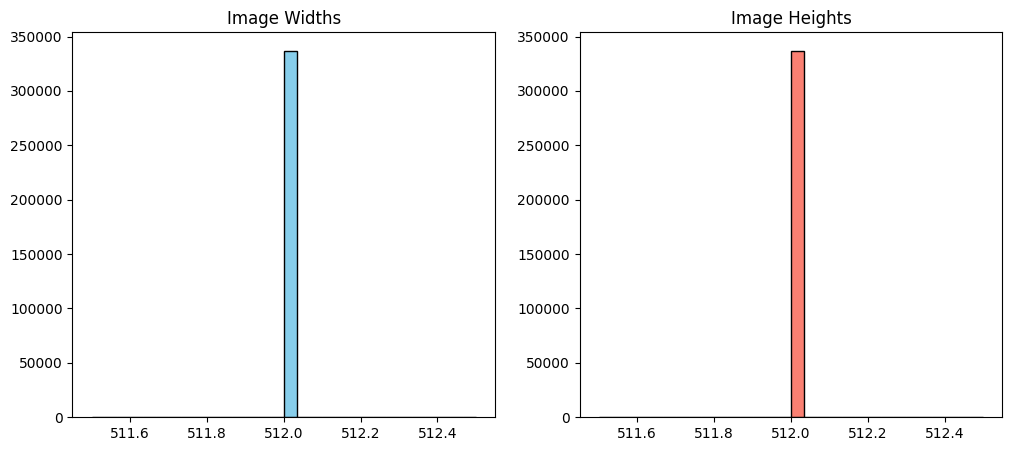

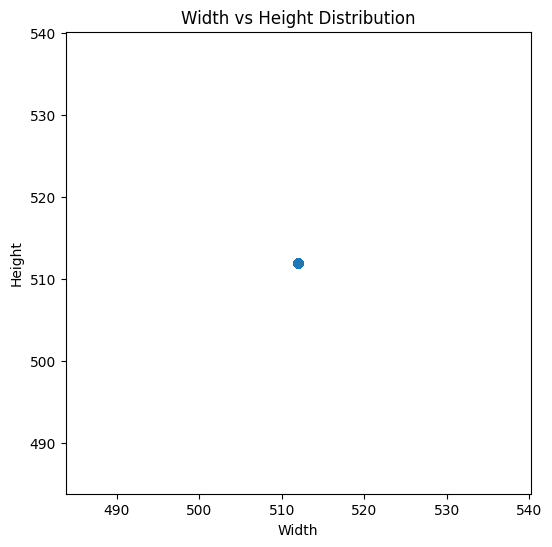

Total images checked: 337038
Corrupted images found: 0


In [8]:
from PIL import Image
widths, heights, corrupted = [], [], []

for root, _, files in os.walk(folder):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):  # all common formats
            filepath = os.path.join(root, file)
            try:
                with Image.open(filepath) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
            except Exception:
                corrupted.append(filepath)
                
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=30, color="skyblue", edgecolor="black")
plt.title("Image Widths")

plt.subplot(1,2,2)
plt.hist(heights, bins=30, color="salmon", edgecolor="black")
plt.title("Image Heights")

plt.show()

# Scatter plot width vs height
plt.figure(figsize=(6,6))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Width vs Height Distribution")
plt.show()

print(f"Total images checked: {len(widths)}")
print(f"Corrupted images found: {len(corrupted)}")

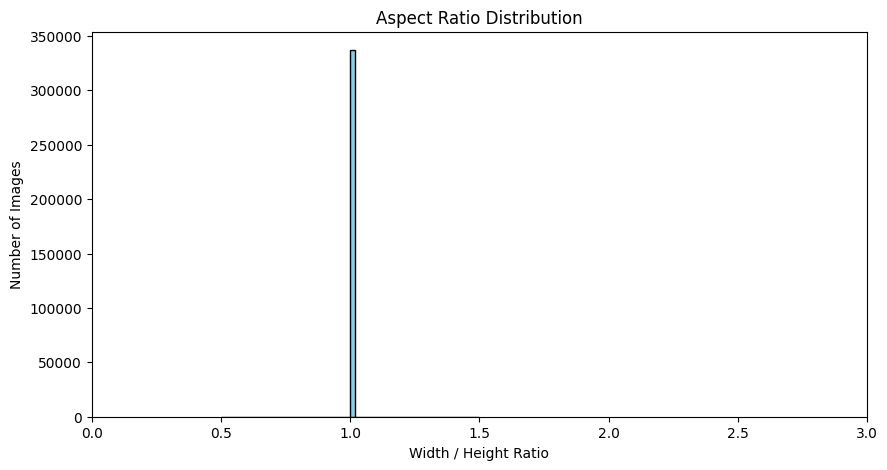

Landscape images: 0
Portrait images: 0
Square-ish images: 337038


In [13]:
aspect_ratios = []
aspect_ratios = [a / b for a, b in zip(widths, heights)]

landscape_count = 0
portrait_count = 0
square_count = 0

for ratio in aspect_ratios:
    if ratio > 1.1:
        landscape_count += 1
    elif ratio < 0.9:
        portrait_count += 1
    else:
        square_count += 1

plt.figure(figsize=(10,5))
plt.hist(aspect_ratios, bins=50, color="skyblue", edgecolor="black")
plt.xlim(0, 3)
plt.xlabel("Width / Height Ratio")
plt.ylabel("Number of Images")
plt.title("Aspect Ratio Distribution")
plt.show()

print("Landscape images:", landscape_count)
print("Portrait images:", portrait_count)
print("Square-ish images:", square_count)

In [14]:
import numpy as np
widths = np.array(widths)
heights = np.array(heights)

areas = widths * heights
q1, q3 = np.percentile(areas, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_indices = np.where((areas < lower_bound) | (areas > upper_bound))[0]
print(f"Number of size outliers: {len(outlier_indices)}")

Number of size outliers: 0


In [38]:
import os
import random

root_folder = r"/kaggle/input/tagged-anime-illustrations/danbooru-images/danbooru-images"

all_images = []
for root, _, files in os.walk(root_folder):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):  # filter images
            all_images.append(os.path.join(root, file))

print(f"Total images found: {len(all_images)}")

sampled_images = random.sample(all_images, 5)



Total images found: 337038


Random sample of 5 images:
Tags:  2boys animal animal_on_head animal_on_shoulder atsushi_toushirou back-to-back bird bird_on_arm bird_on_hand bird_on_head bird_on_leg bird_on_shoulder black_hair blonde_hair blue_eyes chick chicken glasses grey_eyes hakata_toushirou ichinashi male_focus military military_uniform multiple_boys necktie on_head red-framed_eyewear shorts sitting touken_ranbu uniform
Tags:  1girl green_eyes green_hair petals shiki_eiki solo touhou zen_(raspberry)
Tags:  1girl artist_request bare_legs barefoot food fork fruit glasses grapes long_hair original petals red_hair shorts smile soaking_feet strawberry surreal tank_top water
Tags:  1girl akemi_homura bird black_hair dress flower funeral_dress hairband highres long_hair looking_at_viewer mahou_shoujo_madoka_magica mahou_shoujo_madoka_magica_movie mchi petals purple_eyes raven_(animal) spider_lily spoilers very_long_hair
Tags:  2girls animal_ears bomber_grape cherry_blossoms comic cup fox_ears fox_tail greyscale hat hi

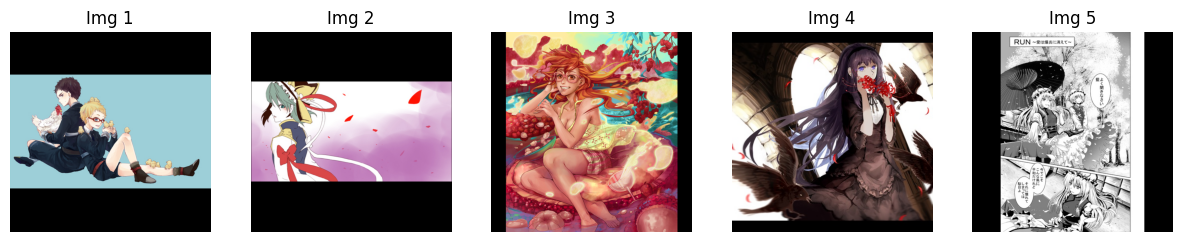

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

print("Random sample of 5 images:")

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sampled_images):
    filename = img_path.split("/")[-1].split(".")[0]
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)   # 1 row, 5 columns
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Img {i+1}")
    print("Tags: ", id_to_tags[filename])
    
plt.show()